In [1]:
# Import required libraries
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Load the dataset
data = pd.read_excel('data.xlsx')

In [5]:
# Filter data to include only European countries
europe_data = data[data['Continent'] == 'Europe']

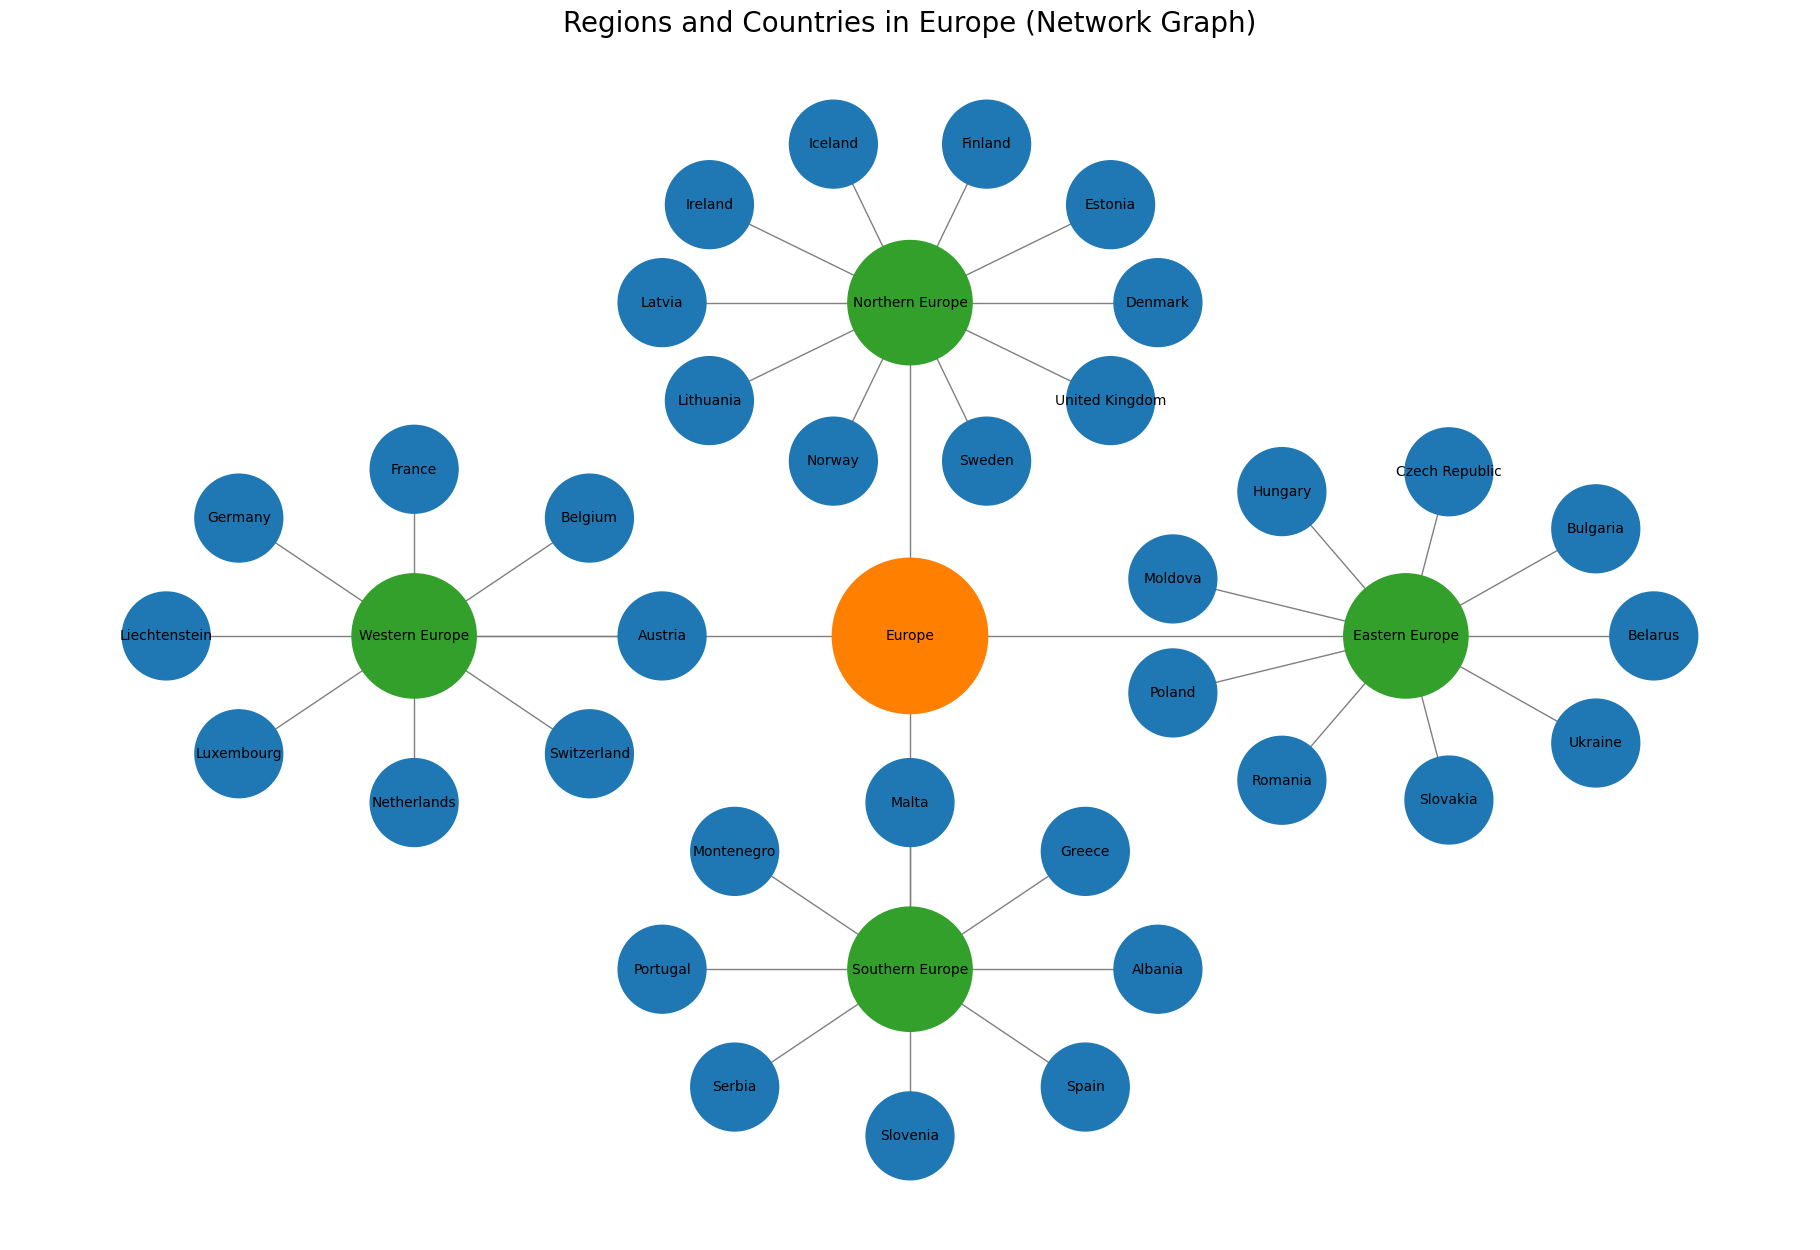

In [13]:
# Create a graph
G = nx.Graph()

# Add a central node for Europe (since there is only one continent: Europe)
G.add_node('Europe', type='continent')

# Add nodes for regions and connect them to Europe
regions = ['Northern Europe', 'Southern Europe', 'Eastern Europe', 'Western Europe']
for region in regions:
    G.add_node(region, type='region')
    G.add_edge('Europe', region)

# Add nodes for countries and connect them to their regions (omit population and area)
for _, row in europe_data.iterrows():
    country = row['country_name']
    region = row['region']

    # Add country node without population and area attributes
    G.add_node(country, type='country')
    G.add_edge(region, country)  # Connect country to its region

# Define region positions (compass layout)
region_positions = {
    'Northern Europe': (0, 1),  # Top
    'Southern Europe': (0, -1),  # Bottom
    'Eastern Europe': (1, 0),   # Right
    'Western Europe': (-1, 0)   # Left
}

# Initialize positions for the nodes
pos = {'Europe': (0, 0)}  # Place Europe at the center

# Assign positions for regions based on compass layout
for region, position in region_positions.items():
    pos[region] = position

# Assign circular positions for countries around their respective regions
for region in regions:
    # Get the list of countries in this region
    countries_in_region = europe_data[europe_data['region'] == region]['country_name'].tolist()
    
    # Get the angle increment for positioning countries in a circle
    num_countries = len(countries_in_region)
    region_pos = pos[region]
    
    # Calculate positions in a circle around the region
    for i, country in enumerate(countries_in_region):
        angle = 2 * np.pi * i / num_countries  # Divide the circle into equal parts
        x_offset = region_pos[0] + 0.5 * np.cos(angle)  # 0.2 is the radius of the circle
        y_offset = region_pos[1] + 0.5 * np.sin(angle)
        pos[country] = (x_offset, y_offset)

# Define node colors and sizes
node_colors = []
node_sizes = []
labels = {}

# Define the node attributes for the graph
for node in G.nodes(data=True):
    if node[1]['type'] == 'continent':
        node_colors.append('#ff7f00')  # Orange for Europe
        node_sizes.append(12500)
        labels[node[0]] = node[0]
    elif node[1]['type'] == 'region':
        node_colors.append('#33a02c')  # Green for regions
        node_sizes.append(8000)
        labels[node[0]] = node[0]
    elif node[1]['type'] == 'country':
        node_colors.append('#1f78b4')  # Blue for countries
        node_sizes.append(4000)  # Default size for countries
        labels[node[0]] = node[0]

# Draw the graph
plt.figure(figsize=(18, 12))

nx.draw(
    G, pos,
    with_labels=False,  # Turn off default labels
    node_color=node_colors,
    node_size=node_sizes,
    edge_color='gray',
    alpha=1,
    width=1  # Thicker edges for visibility
)

# Add labels manually
for node, (x, y) in pos.items():
    plt.text(
        x, y, labels[node],
        fontsize=10 if labels[node] else 0,  # Smaller font for less clutter
        ha='center', va='center')

# Add a title
plt.title("Regions and Countries in Europe (Network Graph)", fontsize=20)

# Save the graph as a PNG file
plt.savefig('europe_network_graph.png', format='png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()